In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [29]:
df=pd.read_excel('weight_height.xlsx')

In [30]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

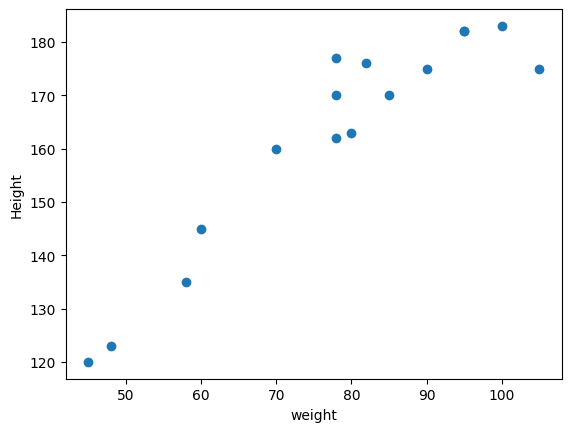

In [31]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("weight")
plt.ylabel("Height")

In [32]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


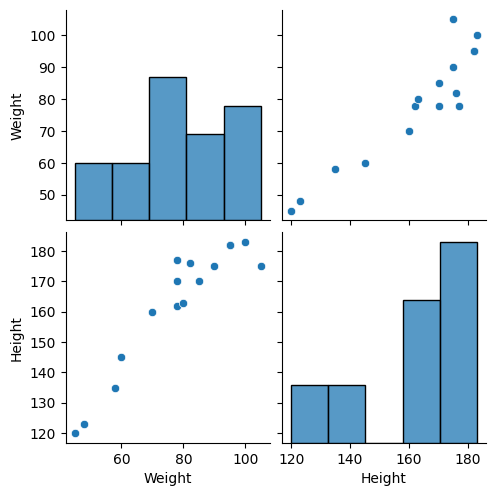

In [33]:
## Seaborn for visulation
import seaborn as sns
sns.pairplot(df)

In [34]:
## Independent and dependent feature
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [35]:
X=df[['Weight']]## independent feature should be dataframe or 2 dimensional array
Y=df['Height']## This variable can be in series or 1 variable form

In [36]:
X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [37]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
Name: Height, dtype: int64

In [38]:
## Train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [39]:
X_test.shape

(4, 1)

In [40]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [42]:
X_test=scaler.transform(X_test)

In [43]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [44]:
## Apply simple Linear Regrression
from sklearn.linear_model import LinearRegression

In [45]:
regression=LinearRegression(n_jobs=-1)

In [46]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [47]:
print("COefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

COefficient or slope [15.34724528]
Intercept 167.58333333333334


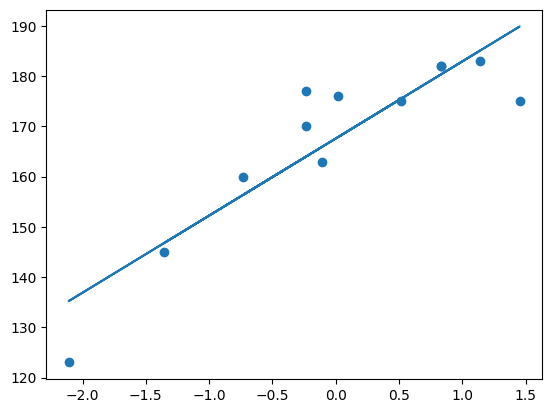

In [48]:
## Plot Training Data plot bestfit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

## Predection of test data
1. Predicted height output=intercept+coef_(weights)
2. y_pred_test=65.4364+1.26(x_test)

In [49]:
## Predection for test data
Y_pred=regression.predict(X_test)

In [50]:
## Performance matrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [51]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


In [52]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,Y_pred)
print(score)

0.8444135525153134


In [67]:
## Predection for new data
regression.predict(scaler.transform([[40]]))

c:\Users\91817\Desktop\Python AI&ML\venve\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([127.55127267])